<a href="https://colab.research.google.com/github/Tmak453/AI_Research_Project_TylerM/blob/main/Research_Project_Tyler_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Research Project Tyler M**

Name: Tyler Makris

Student ID: 991571812

Project: Abalone

Task: Classification

Target Value: Sex

# Getting the Abalone Dataset

Install ucimlrepo to get the dataset

In [ ]:
# Line for installing the necessary package
!pip install ucimlrepo

Install pycaret

In [ ]:
# Installing pycaret
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 10.1 MB

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# Concat the data
abaloneData = pd.concat([X, y], axis=1)

#Dispplay the data
data_top = abaloneData.head()

data_top


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Setup training environment and transformation pipeline

In [ ]:
from pycaret.classification import *

#Setting up the environment
s = setup(abaloneData, target = 'Sex', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 9)"
5,Transformed data shape,"(4177, 9)"
6,Transformed train set shape,"(2923, 9)"
7,Transformed test set shape,"(1254, 9)"
8,Numeric features,8
9,Preprocess,True


Using ClassificationExperiment

In [ ]:
from pycaret.classification import ClassificationExperiment
experiment = ClassificationExperiment()

#Using object oriented API
experiment.setup(abaloneData, target = 'Sex', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 9)"
5,Transformed data shape,"(4177, 9)"
6,Transformed train set shape,"(2923, 9)"
7,Transformed test set shape,"(1254, 9)"
8,Numeric features,8
9,Preprocess,True


# Comparing the Models

Comparing baseline models

In [ ]:
# Model comparison
bestModels = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5549,0.7544,0.5549,0.5462,0.5370,0.3267,0.3343,0.6240
ridge,Ridge Classifier,0.5491,0.0000,0.5491,0.5358,0.5304,0.3210,0.3279,0.0690
lda,Linear Discriminant Analysis,0.5484,0.7497,0.5484,0.5412,0.5394,0.3186,0.3216,0.0420
gbc,Gradient Boosting Classifier,0.5481,0.7433,0.5481,0.5369,0.5373,0.3176,0.3207,1.6310
rf,Random Forest Classifier,0.5436,0.7409,0.5436,0.5365,0.5384,0.3125,0.3135,0.6270
catboost,CatBoost Classifier,0.5412,0.7383,0.5412,0.5355,0.5370,0.3096,0.3103,6.5050
et,Extra Trees Classifier,0.5330,0.7361,0.5330,0.5250,0.5274,0.2973,0.2982,0.6320
lightgbm,Light Gradient Boosting Machine,0.5323,0.7334,0.5323,0.5262,0.5282,0.2960,0.2966,0.5570
ada,Ada Boost Classifier,0.5316,0.7280,0.5316,0.5142,0.5086,0.2920,0.2995,0.2120
svm,SVM - Linear Kernel,0.5269,0.0000,0.5269,0.4707,0.4347,0.2801,0.3459,0.1460


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

Using OOP to compare the models

In [ ]:
# Object Oriented API
experiment.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5549,0.7544,0.5549,0.5462,0.5370,0.3267,0.3343,0.2450
ridge,Ridge Classifier,0.5491,0.0000,0.5491,0.5358,0.5304,0.3210,0.3279,0.0380
lda,Linear Discriminant Analysis,0.5484,0.7497,0.5484,0.5412,0.5394,0.3186,0.3216,0.0660
gbc,Gradient Boosting Classifier,0.5481,0.7433,0.5481,0.5369,0.5373,0.3176,0.3207,1.6300
rf,Random Forest Classifier,0.5436,0.7409,0.5436,0.5365,0.5384,0.3125,0.3135,0.5270
catboost,CatBoost Classifier,0.5412,0.7383,0.5412,0.5355,0.5370,0.3096,0.3103,6.2460
et,Extra Trees Classifier,0.5330,0.7361,0.5330,0.5250,0.5274,0.2973,0.2982,0.3900
lightgbm,Light Gradient Boosting Machine,0.5323,0.7334,0.5323,0.5262,0.5282,0.2960,0.2966,1.1090
ada,Ada Boost Classifier,0.5316,0.7280,0.5316,0.5142,0.5086,0.2920,0.2995,0.3770
svm,SVM - Linear Kernel,0.5269,0.0000,0.5269,0.4707,0.4347,0.2801,0.3459,0.0800


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Analyzing The Models

Plot the confusion matrix

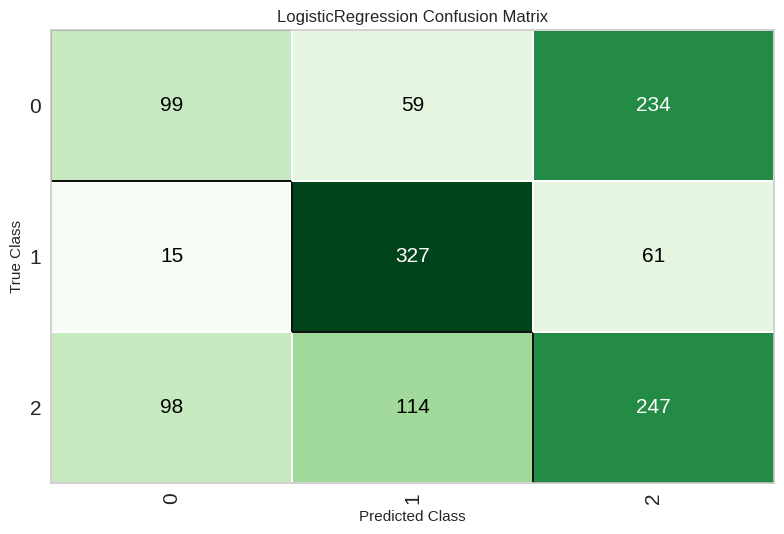

In [ ]:
# Confusion Matrix
plot_model(bestModels, plot = 'confusion_matrix')

Plot the AUC

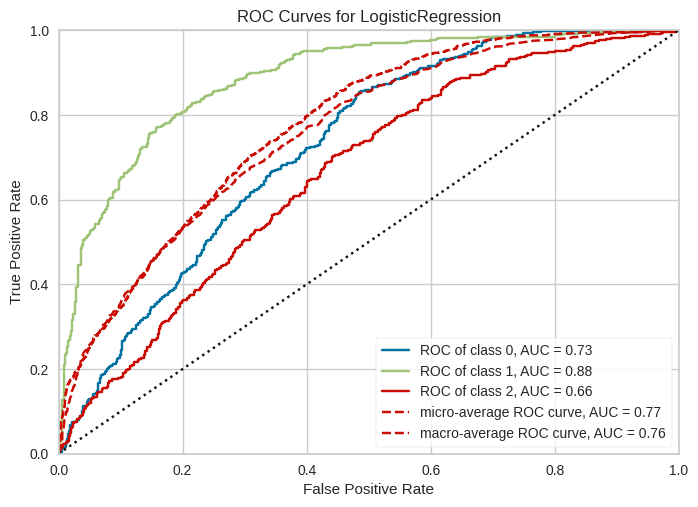

In [ ]:
# AUC
plot_model(bestModels, plot = 'auc')

Plot the feature importance

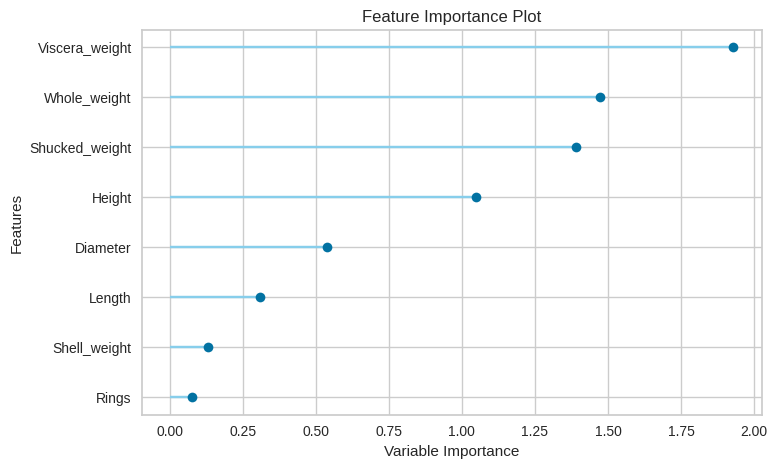

In [ ]:
# Feature importance
plot_model(bestModels, plot = 'feature')

# Predicting

Model Predicton using test set

In [ ]:
# Predicting with test set
holdout_pred = predict_model(bestModels)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5367,0.7536,0.5367,0.5230,0.5159,0.2989,0.3062


Show the predictions dataframe

In [ ]:
# Show predictions
holdout_pred.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex,prediction_label,prediction_score
1948,0.635,0.515,0.165,1.2290,0.5055,0.2975,0.3535,10,M,F,0.4948
956,0.495,0.400,0.135,0.6100,0.2720,0.1435,0.1440,7,M,I,0.5158
1341,0.585,0.490,0.185,1.1710,0.5220,0.2535,0.3350,10,M,M,0.4996
821,0.370,0.275,0.140,0.2215,0.0970,0.0455,0.0615,6,I,I,0.8116
569,0.410,0.320,0.115,0.3870,0.1650,0.1005,0.0985,11,F,I,0.4536


Scoring without the labels

In [ ]:
#Create new dataframe without labels
new_df = abaloneData.copy()
new_df.drop('Sex', axis=1, inplace=True)
new_df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Predicting with new_df

In [ ]:
#Predicting without labels
pred = predict_model(bestModels, data = new_df)
pred.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,prediction_label,prediction_score
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,M,0.4599
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,I,0.7620
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,I,0.3888
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,I,0.4140
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,I,0.7656


# Save The Model

Saving the model

In [ ]:
#Saving
save_model(bestModels, 'first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Length', 'Diameter', 'Height',
                                              'Whole_weight', 'Shucked_weight',
                                              'Viscera_weight', 'Shell_weight',
                                              'Rings'],
                                     transformer=SimpleImputer(add_indicato...
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='most_frequent',
                                             

Loading the pipeline

In [ ]:
#Loading
load_pipeline = load_model('first_pipeline')
load_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Length', 'Diameter', 'Height',
                                             'Whole_weight', 'Shucked_weight',
                                             'Viscera_weight', 'Shell_weight',
                                             'Rings'],
                                    transformer=SimpleImputer(a...
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('trained_model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

# Setup function by function

Function by Function set up

In [ ]:
# Setup
s = setup(abaloneData, target = 'Sex', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 9)"
5,Transformed data shape,"(4177, 9)"
6,Transformed train set shape,"(2923, 9)"
7,Transformed test set shape,"(1254, 9)"
8,Numeric features,8
9,Preprocess,True


Accessing X_train_transformed

In [ ]:
# Access X_train_transformed
get_config('X_train_transformed')

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
629,0.340,0.265,0.085,0.1835,0.0770,0.0460,0.0650,10.0
1496,0.620,0.480,0.165,1.0725,0.4815,0.2350,0.3120,9.0
323,0.265,0.205,0.070,0.1055,0.0390,0.0410,0.0350,5.0
2473,0.615,0.470,0.175,1.2985,0.5135,0.3430,0.3200,14.0
3996,0.315,0.230,0.000,0.1340,0.0575,0.0285,0.3505,6.0
...,...,...,...,...,...,...,...,...
4140,0.645,0.535,0.190,1.2395,0.4680,0.2385,0.4240,10.0
2478,0.470,0.355,0.180,0.4410,0.1525,0.1165,0.1350,8.0
3060,0.630,0.515,0.175,1.1955,0.4920,0.2470,0.3700,11.0
3939,0.555,0.420,0.145,0.8695,0.3075,0.2575,0.2500,14.0


Setup normalize

In [ ]:
# Setting up normalize
s = s = setup(abaloneData, target = 'Sex', session_id = 123, normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 9)"
5,Transformed data shape,"(4177, 9)"
6,Transformed train set shape,"(2923, 9)"
7,Transformed test set shape,"(1254, 9)"
8,Numeric features,8
9,Preprocess,True


Checking X_train_transformed

<Axes: >

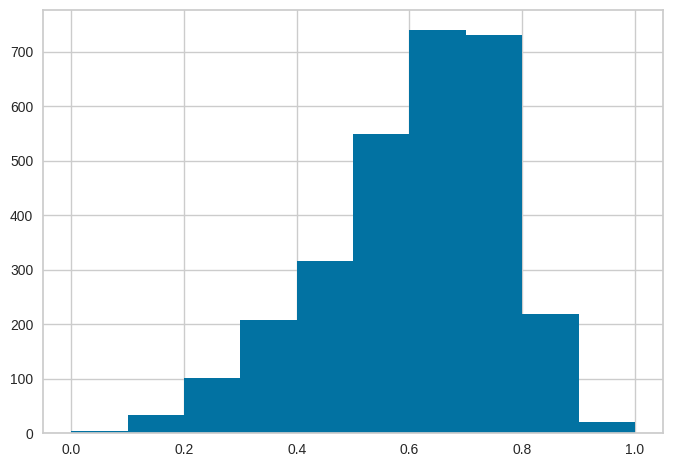

In [ ]:
# Check X_train_transformed
get_config('X_train_transformed')['Length'].hist()

# Comparing Models (Top 3)

Using compare_models()

In [ ]:
#Compare models
bestModels = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5566,0.7539,0.5566,0.5484,0.5400,0.3296,0.3366,0.7960
svm,SVM - Linear Kernel,0.5563,0.0000,0.5563,0.5114,0.5155,0.3292,0.3529,0.0700
ridge,Ridge Classifier,0.5525,0.0000,0.5525,0.5398,0.5346,0.3264,0.3330,0.0450
lda,Linear Discriminant Analysis,0.5484,0.7497,0.5484,0.5412,0.5394,0.3186,0.3216,0.0500
gbc,Gradient Boosting Classifier,0.5481,0.7435,0.5481,0.5369,0.5374,0.3176,0.3207,1.8610
rf,Random Forest Classifier,0.5416,0.7406,0.5416,0.5346,0.5366,0.3095,0.3104,0.5460
catboost,CatBoost Classifier,0.5409,0.7383,0.5409,0.5352,0.5367,0.3090,0.3098,6.3280
lightgbm,Light Gradient Boosting Machine,0.5347,0.7366,0.5347,0.5282,0.5298,0.2993,0.3002,1.1380
et,Extra Trees Classifier,0.5330,0.7360,0.5330,0.5251,0.5274,0.2973,0.2982,0.4030
ada,Ada Boost Classifier,0.5316,0.7280,0.5316,0.5142,0.5086,0.2920,0.2995,0.3780


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

The top 3 models

In [ ]:
# Find the top 3 models
bestModels_recall_top3 = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5566,0.7539,0.5566,0.5484,0.5400,0.3296,0.3366,0.0850
svm,SVM - Linear Kernel,0.5563,0.0000,0.5563,0.5114,0.5155,0.3292,0.3529,0.0640
ridge,Ridge Classifier,0.5525,0.0000,0.5525,0.5398,0.5346,0.3264,0.3330,0.0460
lda,Linear Discriminant Analysis,0.5484,0.7497,0.5484,0.5412,0.5394,0.3186,0.3216,0.0500
gbc,Gradient Boosting Classifier,0.5481,0.7435,0.5481,0.5369,0.5374,0.3176,0.3207,1.6380
rf,Random Forest Classifier,0.5416,0.7406,0.5416,0.5346,0.5366,0.3095,0.3104,0.7760
catboost,CatBoost Classifier,0.5409,0.7383,0.5409,0.5352,0.5367,0.3090,0.3098,6.3980
lightgbm,Light Gradient Boosting Machine,0.5347,0.7366,0.5347,0.5282,0.5298,0.2993,0.3002,0.8780
et,Extra Trees Classifier,0.5330,0.7360,0.5330,0.5251,0.5274,0.2973,0.2982,0.3970
ada,Ada Boost Classifier,0.5316,0.7280,0.5316,0.5142,0.5086,0.2920,0.2995,0.2160


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

List of the top 3 models

In [ ]:
#List the models
bestModels_recall_top3

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge',
               max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
               power_t=0.5, random_state=123, shuffle=True, tol=0.001,
               validation_fraction=0.1, verbose=0, warm_start=False),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, positive=False, random_state=123, solver='auto',
                 tol=0.0001)]

#Creating the Model


Training with logistic regression (10 fold)


In [ ]:
#Using logistic regression
log_reg = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5631,0.7479,0.5631,0.5588,0.5491,0.3399,0.3463
1,0.5836,0.7764,0.5836,0.5872,0.5763,0.3700,0.3755
2,0.5392,0.7508,0.5392,0.5280,0.5264,0.3030,0.3074
3,0.5856,0.7482,0.5856,0.5796,0.5580,0.3733,0.3869
4,0.5479,0.7467,0.5479,0.5334,0.5222,0.3139,0.3243
5,0.5205,0.7382,0.5205,0.5046,0.5048,0.2766,0.2806
6,0.5514,0.7517,0.5514,0.5469,0.5394,0.3205,0.3261
7,0.5514,0.7626,0.5514,0.5315,0.5343,0.3242,0.3283
8,0.5753,0.7488,0.5753,0.5784,0.5588,0.3566,0.3665


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

With Scoring Grid

In [ ]:
# Show scoring grid
log_reg_results = pull()
print(type(log_reg_results))
log_reg_results

<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5631,0.7479,0.5631,0.5588,0.5491,0.3399,0.3463
1,0.5836,0.7764,0.5836,0.5872,0.5763,0.3700,0.3755
2,0.5392,0.7508,0.5392,0.5280,0.5264,0.3030,0.3074
3,0.5856,0.7482,0.5856,0.5796,0.5580,0.3733,0.3869
4,0.5479,0.7467,0.5479,0.5334,0.5222,0.3139,0.3243
5,0.5205,0.7382,0.5205,0.5046,0.5048,0.2766,0.2806
6,0.5514,0.7517,0.5514,0.5469,0.5394,0.3205,0.3261
7,0.5514,0.7626,0.5514,0.5315,0.5343,0.3242,0.3283
8,0.5753,0.7488,0.5753,0.5784,0.5588,0.3566,0.3665


Training with logistic regression (3 fold)

In [ ]:
# Train the logistic regression model wit a fold of 3
log_reg = create_model('lr', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5651,0.7572,0.5651,0.5595,0.5538,0.3423,0.3472
1,0.5554,0.7464,0.5554,0.5498,0.5327,0.3270,0.3372
2,0.5595,0.7565,0.5595,0.5475,0.5420,0.3342,0.3407
Mean,0.5600,0.7533,0.5600,0.5523,0.5428,0.3345,0.3417
Std,0.0040,0.0049,0.0040,0.0052,0.0086,0.0063,0.0042


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Training with logistic regression (Specific model parameters)

In [ ]:
# Using specific parameters
create_model('lr', C = 0.5, l1_ratio = 0.15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5563,0.7427,0.5563,0.5507,0.5371,0.3281,0.3369
1,0.5768,0.7730,0.5768,0.5853,0.5636,0.3579,0.3680
2,0.5427,0.7503,0.5427,0.5355,0.5252,0.3060,0.3145
3,0.5822,0.7461,0.5822,0.5847,0.5539,0.3672,0.3823
4,0.5411,0.7429,0.5411,0.5224,0.5106,0.3025,0.3146
5,0.5274,0.7347,0.5274,0.5185,0.5082,0.2840,0.2914
6,0.5377,0.7501,0.5377,0.5361,0.5204,0.2973,0.3068
7,0.5788,0.7601,0.5788,0.5661,0.5588,0.3633,0.3712
8,0.5616,0.7452,0.5616,0.5706,0.5410,0.3343,0.3475


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.15, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Training logistic regression, return train score, and CV

In [ ]:
# Return train core
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Tunning The Model

Train model with default parameters

In [ ]:
# Using dt
model_dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4915,0.6172,0.4915,0.5019,0.4946,0.2371,0.2382
1,0.5188,0.6366,0.5188,0.5261,0.5218,0.2767,0.2770
2,0.4949,0.6190,0.4949,0.5019,0.4974,0.2399,0.2402
3,0.4623,0.5956,0.4623,0.4545,0.4572,0.1934,0.1939
4,0.4692,0.6002,0.4692,0.4662,0.4676,0.2016,0.2016
5,0.4795,0.6084,0.4795,0.4767,0.4776,0.2190,0.2192
6,0.5000,0.6222,0.5000,0.5084,0.5038,0.2475,0.2477
7,0.4760,0.6058,0.4760,0.4702,0.4723,0.2136,0.2140
8,0.4692,0.6005,0.4692,0.4639,0.4658,0.2038,0.2041


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Hyper parameter tuning

In [ ]:
# Hyper parameter tunning
tuned_model_dt = tune_model(model_dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5358,0.7554,0.5358,0.5482,0.5356,0.2966,0.3008
1,0.5392,0.7378,0.5392,0.5502,0.5132,0.2947,0.3191
2,0.5734,0.7495,0.5734,0.5959,0.5804,0.3567,0.3587
3,0.5445,0.7255,0.5445,0.5257,0.4937,0.3095,0.3305
4,0.5205,0.7447,0.5205,0.5015,0.4994,0.2790,0.2852
5,0.5000,0.7194,0.5000,0.4952,0.4972,0.2491,0.2493
6,0.5514,0.7555,0.5514,0.5572,0.5493,0.3202,0.3239
7,0.5445,0.7428,0.5445,0.5477,0.5403,0.3202,0.3244
8,0.5377,0.7296,0.5377,0.5324,0.5089,0.2926,0.3138


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Using a tuning grid

In [ ]:
# Tunning grid
model_dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

tuned_model_dt = tune_model(model_dt, custom_grid = model_dt_grid, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5324,0.7483,0.5324,0.5353,0.5249,0.3034,0.3096
1,0.5666,0.7450,0.5666,0.5748,0.5544,0.3403,0.3528
2,0.5836,0.7535,0.5836,0.5990,0.5739,0.3660,0.3799
3,0.5548,0.7359,0.5548,0.5454,0.5457,0.3261,0.3292
4,0.5685,0.7335,0.5685,0.5626,0.5484,0.3432,0.3554
5,0.5171,0.7245,0.5171,0.5146,0.5125,0.2700,0.2720
6,0.5445,0.7364,0.5445,0.5120,0.4943,0.3010,0.3321
7,0.5651,0.7391,0.5651,0.5546,0.5533,0.3427,0.3466
8,0.5068,0.7314,0.5068,0.5201,0.5102,0.2545,0.2561


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


Accessing the tuner object

In [ ]:
# Access tuner object
tuned_model_dt, tuner = tune_model(model_dt, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5358,0.7554,0.5358,0.5482,0.5356,0.2966,0.3008
1,0.5392,0.7378,0.5392,0.5502,0.5132,0.2947,0.3191
2,0.5734,0.7495,0.5734,0.5959,0.5804,0.3567,0.3587
3,0.5445,0.7255,0.5445,0.5257,0.4937,0.3095,0.3305
4,0.5205,0.7447,0.5205,0.5015,0.4994,0.2790,0.2852
5,0.5000,0.7194,0.5000,0.4952,0.4972,0.2491,0.2493
6,0.5514,0.7555,0.5514,0.5572,0.5493,0.3202,0.3239
7,0.5445,0.7428,0.5445,0.5477,0.5403,0.3202,0.3244
8,0.5377,0.7296,0.5377,0.5324,0.5089,0.2926,0.3138


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Tuning with optuna

In [ ]:
# Optuna
tuned_model_dt = tune_model(model_dt, search_library = 'optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5222,0.7319,0.5222,0.5264,0.5241,0.2821,0.2822
1,0.5836,0.7652,0.5836,0.5960,0.5787,0.3677,0.3764
2,0.5734,0.7522,0.5734,0.5786,0.5680,0.3530,0.3591
3,0.5479,0.7307,0.5479,0.5299,0.5339,0.3178,0.3208
4,0.5616,0.7460,0.5616,0.5511,0.5531,0.3385,0.3405
5,0.5308,0.7329,0.5308,0.5259,0.5280,0.2948,0.2950
6,0.5274,0.7297,0.5274,0.5272,0.5257,0.2861,0.2873
7,0.5651,0.7432,0.5651,0.5558,0.5347,0.3366,0.3542
8,0.5308,0.7195,0.5308,0.5152,0.5027,0.2838,0.2996


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-11-30 04:56:59,691] Searching the best hyperparameters using 2923 samples...
[I 2023-11-30 04:57:04,578] Finished hyperparameter search!


# Ensembling The Model

Using bagging to ensemble

In [ ]:
# Bagging
ensemble_model(model_dt, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5051,0.7149,0.5051,0.5106,0.5077,0.2559,0.2560
1,0.5188,0.7054,0.5188,0.5277,0.5220,0.2780,0.2787
2,0.4608,0.6894,0.4608,0.4665,0.4615,0.1932,0.1944
3,0.5171,0.7000,0.5171,0.5135,0.5150,0.2744,0.2746
4,0.4829,0.7018,0.4829,0.4843,0.4822,0.2255,0.2262
5,0.5103,0.6892,0.5103,0.5074,0.5038,0.2689,0.2717
6,0.5240,0.7287,0.5240,0.5226,0.5225,0.2863,0.2869
7,0.5274,0.7312,0.5274,0.5228,0.5189,0.2947,0.2982
8,0.4932,0.6963,0.4932,0.4880,0.4902,0.2392,0.2393


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingClassifier(base_estimator='deprecated', bootstrap=True,
                  bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   random_state=123,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

# Blending The Models

Best models with recall

In [ ]:
# Show top 3 models from recall
bestModels_recall_top3

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge',
               max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
               power_t=0.5, random_state=123, shuffle=True, tol=0.001,
               validation_fraction=0.1, verbose=0, warm_start=False),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, positive=False, random_state=123, solver='auto',
                 tol=0.0001)]

Blending the top 3 models

In [ ]:
# Blend bestModels_recall_top3
blend_models(bestModels_recall_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5597,0.0000,0.5597,0.5503,0.5441,0.3383,0.3447
1,0.5973,0.0000,0.5973,0.5938,0.5938,0.3935,0.3946
2,0.5427,0.0000,0.5427,0.5323,0.5363,0.3121,0.3128
3,0.5890,0.0000,0.5890,0.5799,0.5725,0.3815,0.3892
4,0.5616,0.0000,0.5616,0.5520,0.5535,0.3407,0.3426
5,0.5205,0.0000,0.5205,0.5078,0.5031,0.2749,0.2804
6,0.5445,0.0000,0.5445,0.5405,0.5283,0.3087,0.3169
7,0.5514,0.0000,0.5514,0.5279,0.5287,0.3223,0.3287
8,0.5514,0.0000,0.5514,0.5369,0.5365,0.3242,0.3284


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=123,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('SVM - Linear Kernel',
                              SGDClassifier(alpha=0.0001, average=False,
                                            c...
                                            penalty='l2', power_t=0.5,
                                            random_state=123, shuffle=True,
                                            tol=0.001, validation_fraction=0.1,
                                            verbose=0, warm_start=False)),
                             ('Ridge Classifier',
                              RidgeClassifier(alpha=1.0, class_weight=None,
                                              copy_X=True, fit_intercept=True,
                                              max_iter=None, positive=False,
                                              random_state=123, solver='auto',
                                              tol=0.0001))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='hard', weights=None)

# Stacking The Models

Stack with stack_models

In [ ]:
# Stack the models
stack_models(bestModels_recall_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5631,0.7569,0.5631,0.5615,0.5521,0.3392,0.3450
1,0.5427,0.7711,0.5427,0.5831,0.5505,0.3110,0.3157
2,0.5392,0.7519,0.5392,0.5539,0.5235,0.2967,0.3135
3,0.5753,0.7526,0.5753,0.5668,0.5516,0.3556,0.3669
4,0.5651,0.7523,0.5651,0.5556,0.5471,0.3395,0.3482
5,0.5856,0.7490,0.5856,0.5872,0.5847,0.3793,0.3805
6,0.5582,0.7463,0.5582,0.5584,0.5463,0.3292,0.3371
7,0.5171,0.7686,0.5171,0.5086,0.4811,0.2770,0.2976
8,0.5616,0.7541,0.5616,0.6235,0.5365,0.3283,0.3601


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingClassifier(cv=5,
                   estimators=[('Logistic Regression',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=1000,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=123,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                               ('SVM - Linear Kernel',
                                SGDClassifier(alpha=0.0001, average=...
                                                random_state=123, solver='auto',
                                                tol=0.0001))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=True, stack_method='auto', verbose=0)

# Plotting the Models

Plotting the class report

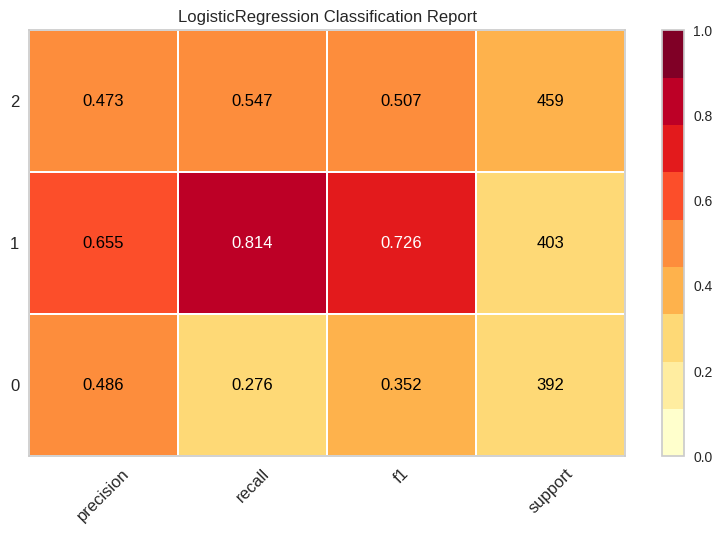

In [ ]:
# Class report
plot_model(bestModels, plot = 'class_report')

Controlling scale of the plot

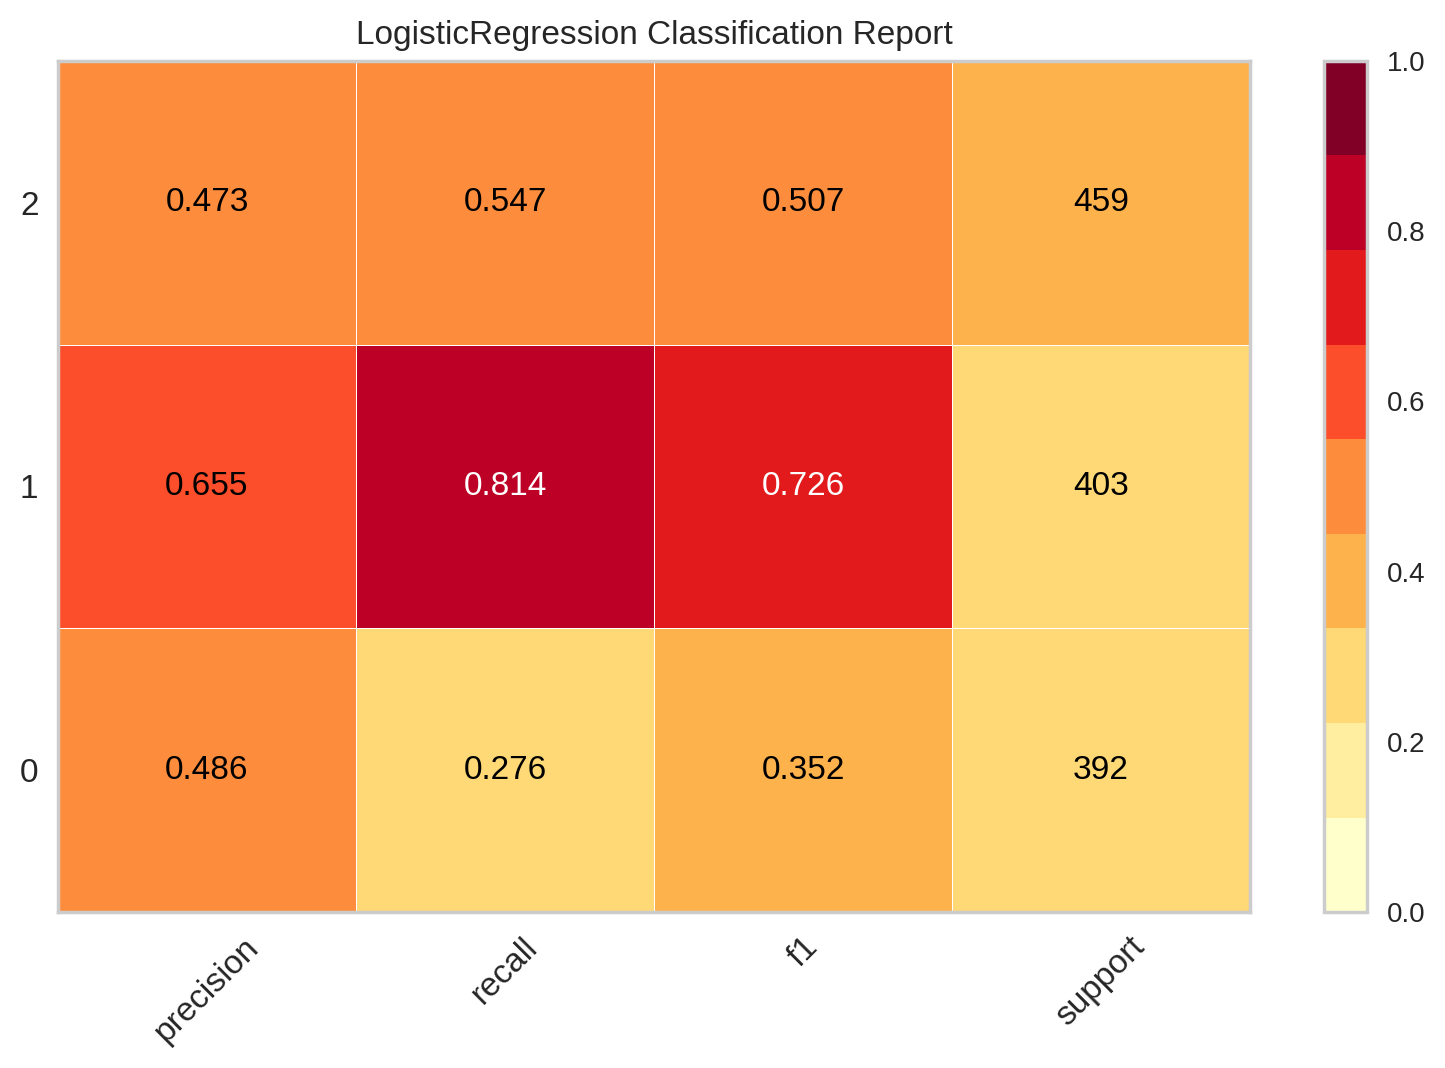

In [ ]:
# Control plot scale
plot_model(bestModels, plot = 'class_report', scale = 2)

Saving the plot

In [ ]:
# Save plot
plot_model(bestModels, plot = 'class_report', save=True)

'Class Report.png'

# Interpretting The Model

Training a lightbgm model

In [ ]:
# Training a lightgbm model
lightgbm_model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5188,0.7290,0.5188,0.5141,0.5159,0.2753,0.2756
1,0.5427,0.7402,0.5427,0.5478,0.5439,0.3098,0.3108
2,0.5461,0.7361,0.5461,0.5429,0.5443,0.3169,0.3171
3,0.5137,0.7108,0.5137,0.4987,0.5008,0.2647,0.2678
4,0.5685,0.7530,0.5685,0.5653,0.5658,0.3492,0.3500
5,0.5034,0.7400,0.5034,0.4920,0.4967,0.2543,0.2547
6,0.5651,0.7415,0.5651,0.5593,0.5598,0.3437,0.3452
7,0.5274,0.7406,0.5274,0.5132,0.5176,0.2910,0.2924
8,0.5274,0.7289,0.5274,0.5199,0.5226,0.2885,0.2891


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Interpretting the summary model

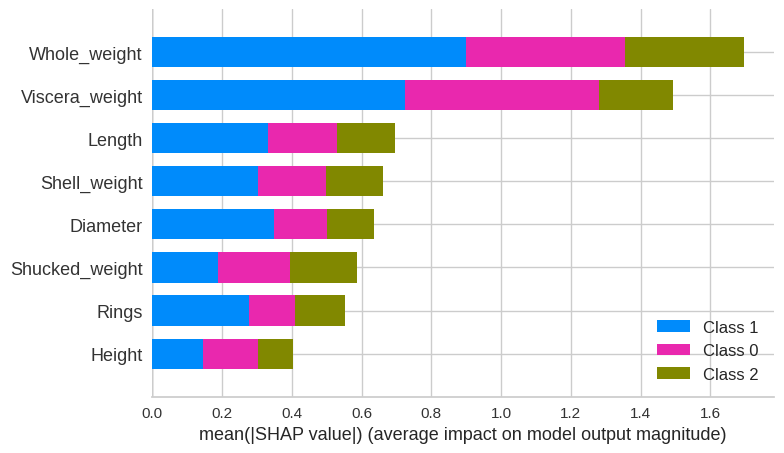

In [ ]:
# Summary model interpretation
interpret_model(lightgbm_model, plot = 'summary')

Reason plot for the test set observation 1

In [ ]:
# Reason plot
interpret_model(lightgbm_model, plot = 'reason', observation = 1)

# Leaderboard

Getting the leaderboard

In [ ]:
# Show leaderboard
leader_board = get_leaderboard()
leader_board

Processing:   0%|          | 0/53 [00:00<?, ?it/s]

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(TransformerWrapperWithInverse(exclude=None, i...",0.5566,0.7539,0.5566,0.5484,0.5400,0.3296,0.3366
1,K Neighbors Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.5217,0.7083,0.5217,0.5174,0.5178,0.2830,0.2841
2,Naive Bayes,"(TransformerWrapperWithInverse(exclude=None, i...",0.5135,0.7276,0.5135,0.4900,0.4839,0.2774,0.2878
3,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.4837,0.6111,0.4837,0.4847,0.4834,0.2247,0.2250
4,SVM - Linear Kernel,"(TransformerWrapperWithInverse(exclude=None, i...",0.5563,0.0000,0.5563,0.5114,0.5155,0.3292,0.3529
5,Ridge Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.5525,0.0000,0.5525,0.5398,0.5346,0.3264,0.3330
6,Random Forest Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.5416,0.7406,0.5416,0.5346,0.5366,0.3095,0.3104
7,Quadratic Discriminant Analysis,"(TransformerWrapperWithInverse(exclude=None, i...",0.5265,0.7379,0.5265,0.5136,0.4942,0.2861,0.2990
8,Ada Boost Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.5316,0.7280,0.5316,0.5142,0.5086,0.2920,0.2995


Selecting best model based on Accuracy

> Indented block



In [ ]:
# Select best model
leader_board.sort_values(by='Accuracy', ascending=False)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Length', 'Diameter', 'Height',
                                             'Whole_weight', 'Shucked_weight',
                                             'Viscera_weight', 'Shell_weight',
                                             'Rings'],
                                    transformer=SimpleImputer(add_indicato...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ['trained_model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False)]],
         verbose=False)

# Using AutoML

In [ ]:
automl()

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=123,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('SVM - Linear Kernel',
                              SGDClassifier(alpha=0.0001, average=False,
                                            c...
                                            penalty='l2', power_t=0.5,
                                            random_state=123, shuffle=True,
                                            tol=0.001, validation_fraction=0.1,
                                            verbose=0, warm_start=False)),
                             ('Ridge Classifier',
                              RidgeClassifier(alpha=1.0, class_weight=None,
                                              copy_X=True, fit_intercept=True,
                                              max_iter=None, positive=False,
                                              random_state=123, solver='auto',
                                              tol=0.0001))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='hard', weights=None)

# Using Dashboard

In [ ]:
# Using dashboard
dashboard(model_dt, display_format ='inline')

Note: model_output=='probability', so assuming that raw shap output of DecisionTreeClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Saving and loading Model

Saving the models

In [ ]:
# Save model
save_model(bestModels, 'abalone_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Length', 'Diameter', 'Height',
                                              'Whole_weight', 'Shucked_weight',
                                              'Viscera_weight', 'Shell_weight',
                                              'Rings'],
                                     transformer=SimpleImputer(add_indicato...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=MinMaxScaler(clip=False,
                                                              copy=True,
                                                              feature_range=(0,
               

Loading the models

In [ ]:
# Load model
load_disk_models = load_model('abalone_model')
load_disk_models

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Length', 'Diameter', 'Height',
                                             'Whole_weight', 'Shucked_weight',
                                             'Viscera_weight', 'Shell_weight',
                                             'Rings'],
                                    transformer=SimpleImputer(a...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ('trained_model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

# Saving and loading the experiement

Saving the experiment

In [ ]:
# Saving experiment
save_experiment('abalone_experiment')

Loading the experiment

In [ ]:
# Loading experiment
experiment_disk = load_experiment('abalone_experiment', data=abaloneData)

,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 9)"
5,Transformed data shape,"(4177, 9)"
6,Transformed train set shape,"(2923, 9)"
7,Transformed test set shape,"(1254, 9)"
8,Numeric features,8
9,Preprocess,True
